# Wykrywanie anomalii sieciowy

# LAB 02 Modele | *Models*

* Rozkłady i anomalie  &nbsp; | &nbsp; *distributions and anomalies*
- Regresja  &nbsp; | &nbsp; *regression*
- Klasyfikacja  &nbsp; | &nbsp; *classification*

## Plan

|  | | |
| -------- | -------|---- |
| Wprowadzenie | *Introduction* | 15 min |
| Rozkłady | *Distributions*  | 20 min |
| Regresja | *Regression*  |20 min |
| Klasyfikacja | *Classification*  | 25 min
| Podsumowanie | *Summary*  | 10 min

In [ ]:
#@title Required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import jax
import jax.numpy as jnp
import functools as ft

# Rozkłady i anomalie  &nbsp; | &nbsp; *Distributions and anomalies*

- anomalia «odchylenie od normy»

  *(statistical) anomaly "deviation from the norm"*

- Co jest normą? Odpowiada rachunek prawdopodobieństwa.
   
  *What is the norm? Correspondence with the calculation of probabilities.*

## Zadanie 1  &nbsp; | &nbsp; *Task 1*

Wylosować 10_000 liczb z rozkładu normalnego $N(0,1)$. Ile spełnia warunek:

*Draw 10_000 numbers from the normal distribution $N(0,1)$. How much meets the condition:*

1. $x-\mu<0\sigma$
2. $x-\mu>1\sigma$
3. $x-\mu<-2\sigma$
4. $x-\mu>5\sigma$
5. $|x-\mu|>5\sigma$

__Co nam mówi obserwacja liczby -8 ?__

*What does observing the number -8 tell us?*

$N(0,1) \in (-\infty, \infty)$


## Zadanie 2 &nbsp; | &nbsp; *Task 1*

Jak powtórzyć wyniki dla rozkładu wykładniczego?

How to replicate the results for the exponential distribution?

In [ ]:
# Task 1
x = np.random.normal(
# Task 2
print('Task 2')
x = np.random.exponential(

Task 1
(1) count(x<0): 4978
(5) count (|x|> 5): 0

Task 2
(1) count(x-mu <0): 6385
(5) count(|x-mu| > 5sigma): 21


## Zadanie &nbsp; | &nbsp; *Task 3*

### twierdzenie graniczne
### *central limit theorem*


Narysować rozkład sumy 30 zmiennych losowych o rozkładzie wykładniczym

*Draw the distribution of the sum of 30 random variables with an exponential distribution*

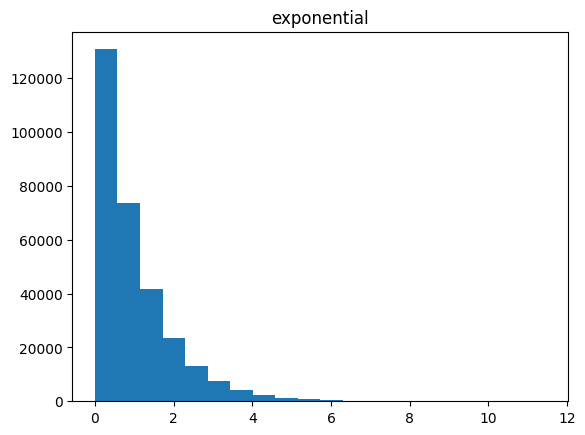

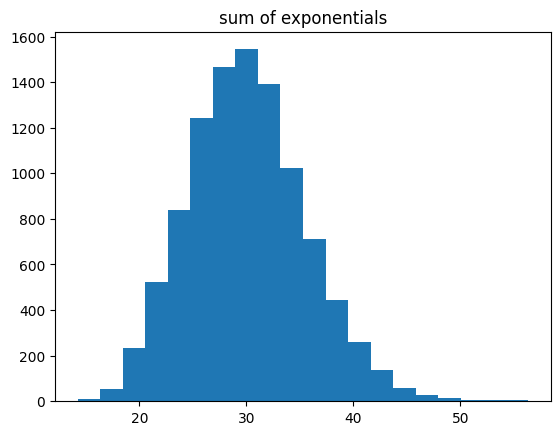

In [ ]:
x = np.random.exponential(



# Modele  &nbsp;  | &nbsp; *Models*

1. Hipoteza $\hat y = f(x,\theta) + \varepsilon$,

   $\varepsilon$ to błąd i zakładamy że pochodzi z pewnego
   rozkładu

  *The hypothesis $\hat{y}=f(x,θ)+ε$,*
  
  *ε is an error and we assume that it comes from a certain distribution*

2. Trening $\theta = \arg\min \frac{1}{N}\sum\ell(y,\hat y)$

   *Training, find:  $\theta = \arg\min \frac{1}{N}\sum\ell(y,\hat y)$*, with $\ell$ an error (loss) function.

# Model liniowy  &nbsp;  | &nbsp; *Linear Models*

$f(x,\theta)=w_0 + w_1x_1 + w_2 x_2 + \ldots$, $\theta=(w_0,w_1,w_2,\ldots)$

$\ell(y,\hat y)=(y-\hat y)^2$ - regresja  &nbsp;  | &nbsp; *ordinary least squares (OLS) regression*

### Diamenty  &nbsp;  | &nbsp; *Diamonds*

In [ ]:
#@title get data
!gdown  https://drive.google.com/uc?id=1c4-h7TLRaDmijstDIFD093to9uZwYA6F

Downloading...
From: https://drive.google.com/uc?id=1c4-h7TLRaDmijstDIFD093to9uZwYA6F
To: /content/diamonds.csv
100% 2.45M/2.45M [00:00<00:00, 163MB/s]


In [ ]:
!head -n3 diamonds.csv

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31


In [ ]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


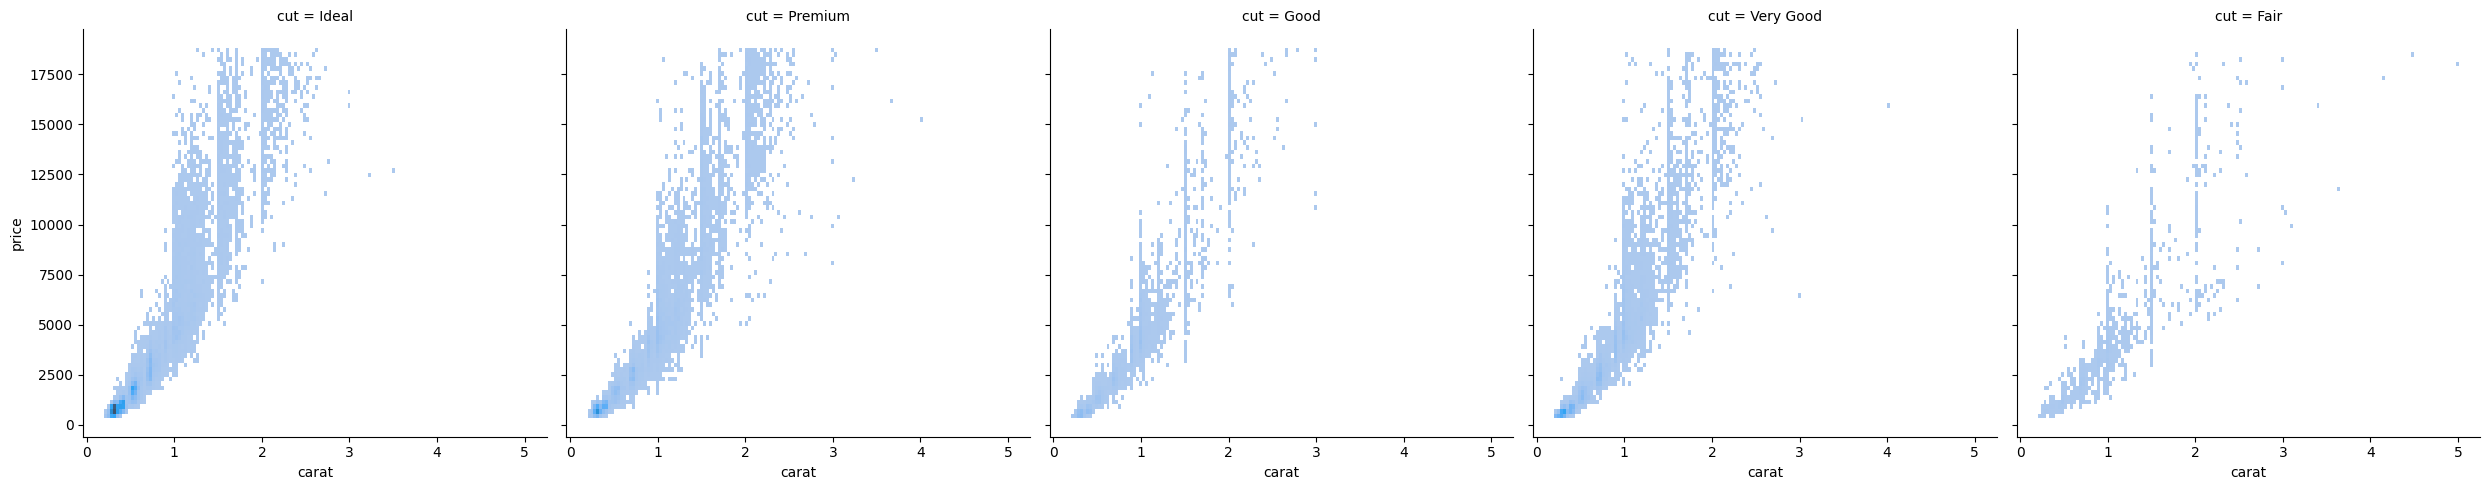

In [ ]:
sns.displot(data=diamonds, x='carat',y='price',col='cut');

# Zadanie 4 &nbsp;  | &nbsp; *Task 4*

Narysowac wykres ceny od wielkosci w skali logarytmicznej

*Draw a price-carat graph on a logarithmic scale*

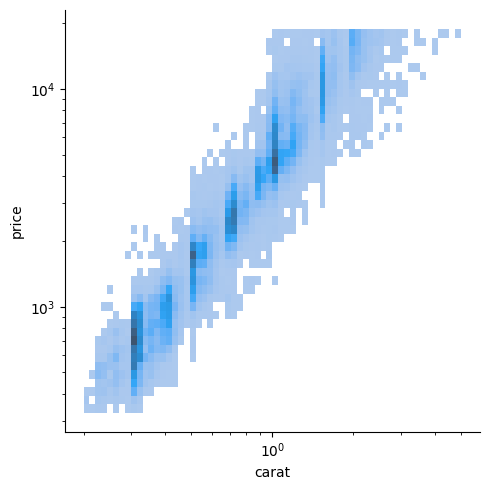

### Dane &nbsp;  | &nbsp; *Data*


In [ ]:
x = diamonds.carat.to_numpy()[..., np.newaxis]
print(x.shape,diamonds.carat.values.shape)
# [...,np.newaxis] add extra dimension from flat (53940,) to (53940, 1)
y = diamonds.price.to_numpy()[..., np.newaxis]
# many options here
print(x.mean(), np.mean(x), diamonds.carat.mean())


yn = (y-np.mean(y))/np.std(y)
xn = (x-np.mean(x))/np.std(x)

xl = jnp.log10(x)
yl = jnp.log10(y)

(53940, 1) (53940,)
0.7979397478680014 0.7979397478680014 0.7979397478680014


### Dopasujmy model liniowy:
  *Let's fit a linear model:*

$\text{price} = w*\text{carat} +b$


### Mini biblioteka &nbsp;  | &nbsp;  *Mini library*

In [ ]:
def init_lm(key,shape):
    return dict(
        w = jax.random.normal(key,shape),
        b = jnp.zeros(shape[-1]),
    )

@jax.jit
def apply_lm(theta:dict, x:jnp.ndarray):
    return x@theta['w'] + theta['b']

@jax.jit
def loss(theta, x, y):
    yhat = apply_lm(theta,x)
    return jnp.mean(jnp.square(y-yhat))

grad_loss = jax.jit(jax.grad(loss))


def fit_lm(x, y, batch_size=128, steps=100, learning_rate=0.01):
    k = jax.random.PRNGKey(42)
    params  = init_lm(k,(x.shape[1],y.shape[1]))
    losses=[]

    def sgd(t, dt):
        return t-learning_rate*dt

    for i in range(steps):
        idx = np.random.randint(0,50000,size=batch_size)
        bx = x[idx,...]
        by = y[idx,...]

        grads = grad_loss(params,bx,by)
        params = jax.tree.map(sgd,params,grads)
        losses.append(loss(params,bx,by))
    return params, losses

### i test działania &nbsp;  | &nbsp;  *and operation test*

In [ ]:

def tmp():
    k = jax.random.PRNGKey(43)
    params = init_lm(k, [1,1])
    x = np.random.normal(size=(8,1))
    print(apply_lm(params,x).shape)
tmp()

(8, 1)


### Model

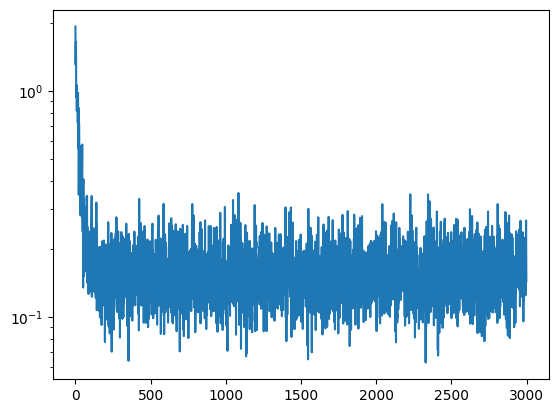

In [ ]:
params, losses = fit_lm(xn, yn,steps=3000)
plt.plot(losses)
plt.yscale('log')

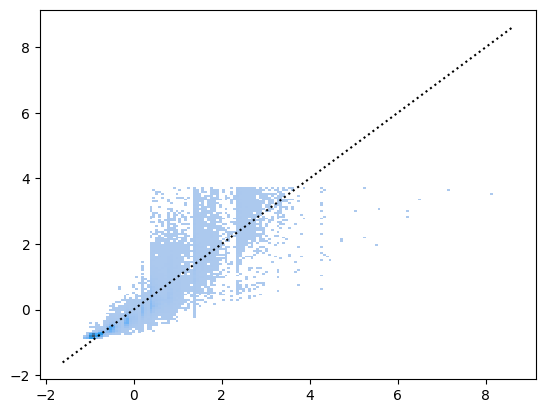

In [ ]:
sns.histplot(x=apply_lm(params,xn).flatten(),y=yn.flatten())
plt.plot(plt.xlim(),plt.xlim(), 'k:');

## Zadanie 5 &nbsp;  | &nbsp; *Task 5*

zbudowac model liniowy na skali logarytmicznej

build a linear model on a logarithmic scale

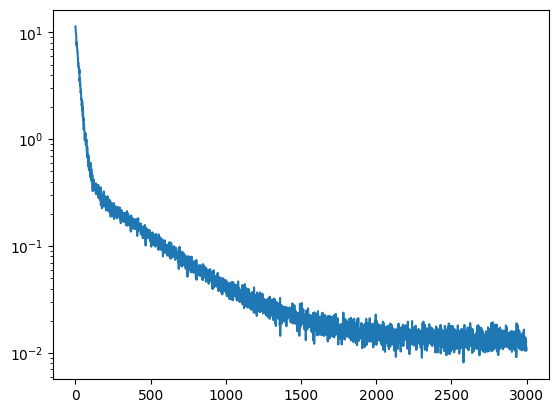

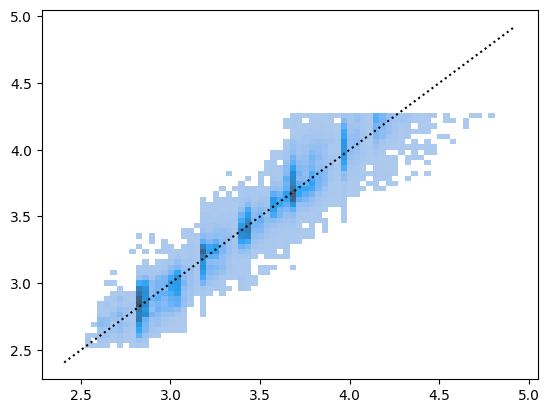

## Zadanie 6 &nbsp;  | &nbsp; *Task 6*

Sprawdzić learning_rate 0.1 i 0.000001

Check learning_rate 0.1 i 0.000001

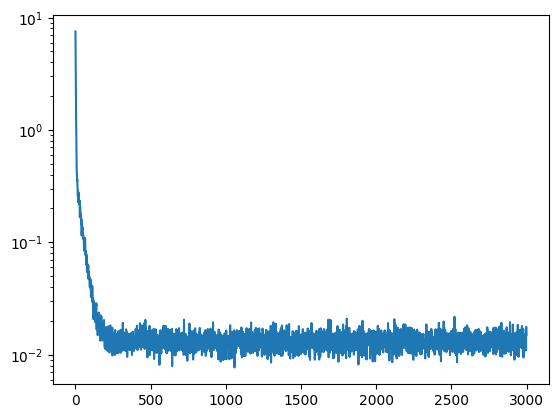

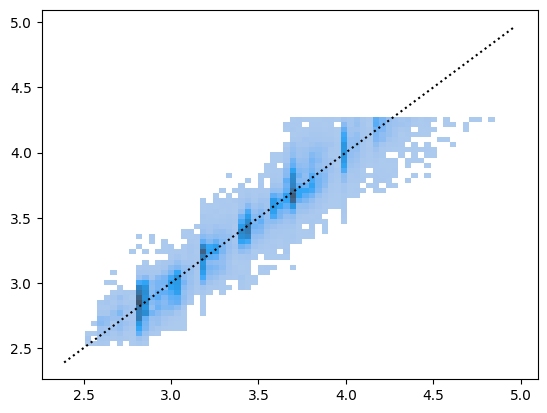

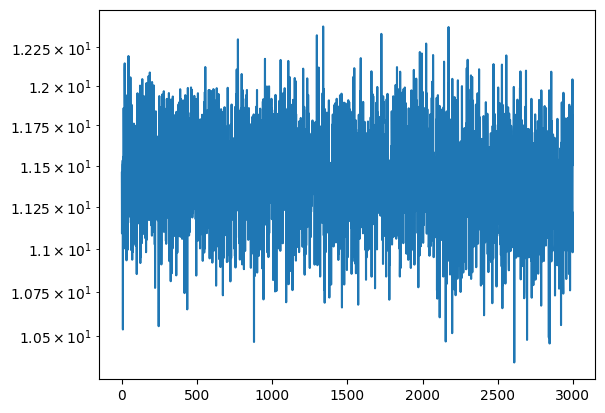

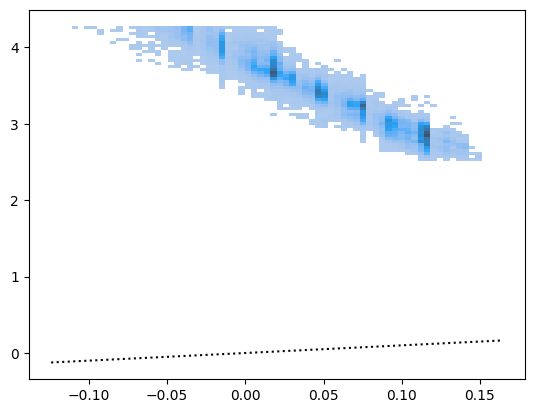


## Zadanie 7 &nbsp;  | &nbsp; *Task 7*
Narysować histogram reszt, ile jest obserwacji powyżej 3 odchylenia standardowe?

*Draw a histogram of the residuals, how many observations are there above 3 standard deviations?*

Array(53940, dtype=int32)

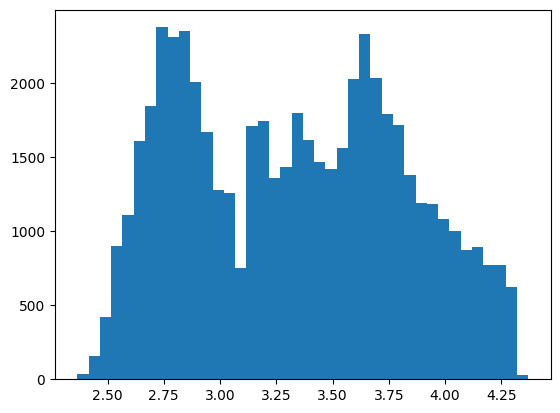


## Anomalie  &nbsp;  | &nbsp; *Anomaly*

Reszty pozwalaja nam wykryć anomalie

The residuals allow us to detect anomalies

In [ ]:
anomalie = np.where(np.abs(resid)>4*np.std(resid))
print(len(anomalie[0]))


anomalie[0]


53940


array([    0,     1,     2, ..., 53937, 53938, 53939])

## Wiele zmiennych &nbsp;  | &nbsp; *Many variables*

Regresja liniowa to nie tylko jedna zmienna.

*Linear regression is not just one variable.*

# Zadanie 8 &nbsp;  | &nbsp; *Task 8*

Wytrenowac model $\log(\text{cena}) = w_0+w_1 \log(x) + w_2 \log(y) + w_3 \log(z) $

NameError: name 'np' is not defined

# Klasyfikacja  &nbsp;  | &nbsp; *Classification*

Diamenty posiadaja cechy, które nei sa liczbami

*Diamonds have characteristics that are not numbers
"Categorical variables"*

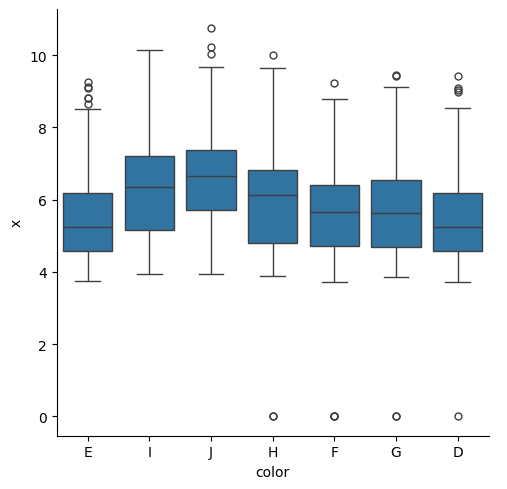

In [ ]:
sns.catplot(data=diamonds, y='x',x='color', kind='box');

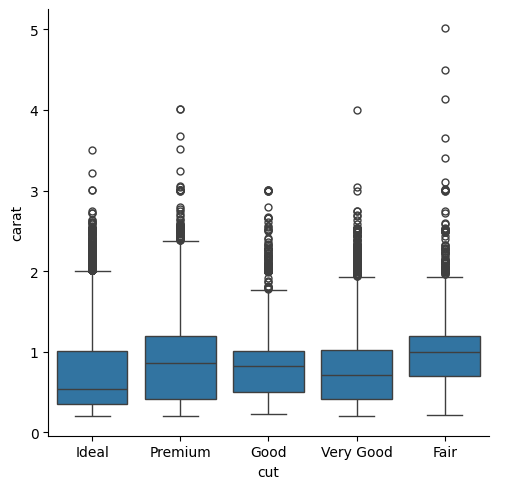

In [ ]:
sns.catplot(data=diamonds, y='carat',x='cut', kind='box');

Czy po wymiarach ocenimy kolor lub szlif?

Jak poprzednio zbudujemy model liniowy, ale tym razem chcemy przewidzieć prawdopodobieństwa klasy.

Funkcją kosztu wlaśnie jest to prawdopodobieństwo

ale

- prawdopodobieństwo $\in(0,1)$
- $\sum p_i=1$

Zwykła funkcja liniowa nie wystarczy ale jest trik, modelujemy $\log\frac{p_i}{1-p_i}$ taka funkcja jest znana jako `logit`

$$\log\frac{p_i}{1-p_i}= w_{0i} + w_{1i}x_1 + w_{2i} x_2 + \ldots=l_i$$

$$p_i = \frac{e^l_i}{\sum_je^{l_j}}$$

Y tez ma  teraz inną postać: hot-1 $y=[0,1,0,0]$.

Prawdopodobienstwo dostania takiego wyniku: $p_1=\mathbf l \cdot \mathbf y$



*Will we judge the color or cut based on the dimensions?*

*As before, we will build a linear model, but this time we want to predict the class probabilities.*

*The cost function is this probability*

*But*

- probability $\in(0,1)$
- $\sum p_i=1$

*A simple linear function is not enough but there is a trick, we model $\log\frac{p_i}{1-p_i}$ such a function is known as `logit`

$$\log\frac{p_i}{1-p_i}= w_{0i} + w_{1i}x_1 + w_{2i} x_2 + \ldots=l_i$$

$$p_i = \frac{e^l_i}{\sum_je^{l_j}}$$

*$y$ now also has a different form: hot-1 $y=[0,1,0,0]$.*

*Probability of getting this result: $p_1=\mathbf l \cdot \mathbf y$*

## Minibiblioteka cd.

In [ ]:
@jax.jit
def loss(theta,x,y):
    l = apply_lm(theta,x)
    lp = jax.nn.log_softmax(l)

    return -jnp.mean(lp*y)

grad_loss = jax.jit(jax.grad(loss))

def fit_glm(x,y,batch_size=256, steps=100, learning_rate=0.01):
    k = jax.random.PRNGKey(42)
    params  = init_lm(k,(x.shape[1],y.shape[1]))
    losses=[]

    def sgd(t, dt):
        return t-learning_rate*dt

    for i in range(steps):
        idx = np.random.randint(0,50000,size=batch_size)
        bx = x[idx,...]
        by = y[idx,...]

        grads = grad_loss(params,bx,by)
        params = jax.tree.map(sgd,params,grads)
        losses.append(loss(params,bx,by))
    return params, losses

@ft.partial(jax.jit, static_argnames=('n'))
def cm(labels, predictions, n):

    def f(carry, pair):
        y,haty = pair
        return carry.at[y,haty].add(1), None

    init = jnp.zeros((n,n), dtype=jnp.uint32)
    confusion_matrix, _ = jax.lax.scan(f, init, (labels, predictions))
    return confusion_matrix

In [ ]:
y = pd.get_dummies(diamonds.color).to_numpy()
x = diamonds[['x','y','z']].to_numpy()

x=(x-np.mean(x,0))/np.std(x,0)

{'b': Array([-0.24858361,  0.10585973,  0.15306234,  0.27556536,  0.06960024,
       -0.11576723, -0.23973575], dtype=float32), 'w': Array([[-1.0936096 ,  0.6705536 ,  0.17760591,  0.40716586, -0.3907683 ,
         1.2864124 ,  0.49087733],
       [ 0.3323398 ,  1.4913474 , -0.25571114,  0.6611434 ,  0.85115814,
        -1.1572895 ,  0.36130536],
       [ 0.7304755 , -1.5728695 ,  0.7123876 , -0.4876576 ,  0.5319235 ,
         0.87639546, -0.0603638 ]], dtype=float32)}


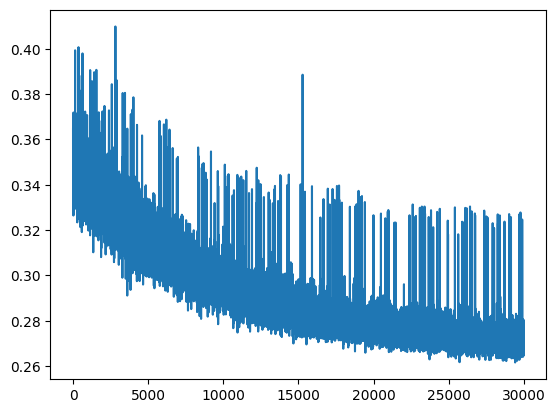

In [ ]:
params, losses = fit_glm(x, y,steps=30000,learning_rate=0.001)
plt.plot(losses)
print(params)

### Dokładność klasyfikacji &nbsp;  | &nbsp; *Classification accuracy*

In [ ]:
c = apply_lm(params,x)
c = jnp.argmax(c,1)

np.mean(c==jnp.argmax(y,1)), 1/7

(Array(0.1855395, dtype=float32), 0.14285714285714285)

20% nie wygląda dobrze, ale trzeba pamiętać że mamy 7 klas i wybierając losowo dostaniemy 14%

*20% doesn't look good, but remember that we have 7 classes and by randomly selecting we will get 14%*

Array([[2275,  498,  291, 2441, 1101,  169,    0],
       [3323,  744,  386, 3455, 1626,  263,    0],
       [2615,  762,  387, 3210, 2191,  377,    0],
       [3237,  686,  409, 3374, 3030,  556,    0],
       [2064,  547,  293, 1948, 2710,  742,    0],
       [1101,  315,  219, 1209, 2060,  518,    0],
       [ 379,  176,  107,  546, 1278,  322,    0]], dtype=uint32)

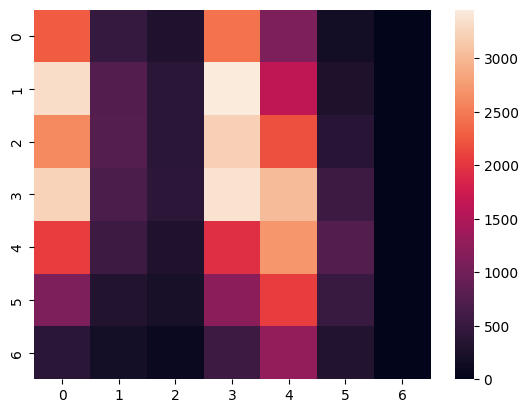

In [ ]:
sns.heatmap(cm(jnp.argmax(y,1),c,7), label=True);
cm(jnp.argmax(y,1),c,7)

### Zadanie 9 &nbsp;  | &nbsp; *Task 9*
zbudowac klasyfikator dla szlifu

build a classifier for cuts

Array(0.43305525, dtype=float32)

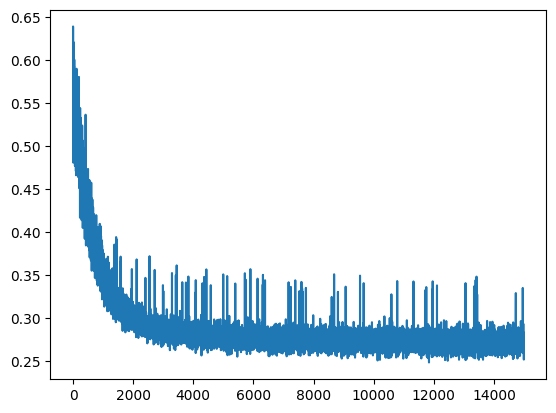

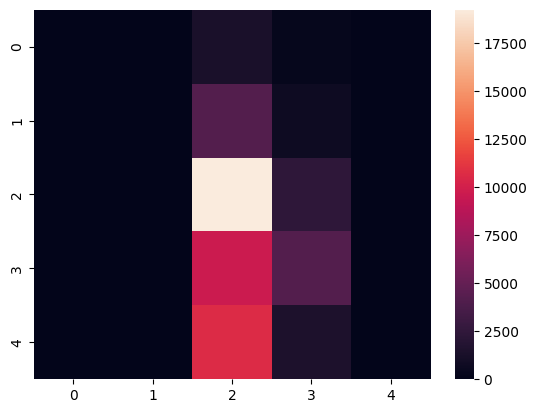